In [2]:
!pip install autogluon.multimodal


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 28.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runti

In [2]:
!pip install torch==2.0.0+cu117 torchaudio==2.0.0 torchvision==0.15.0+cu117 --extra-index-url https://download.pytorch.org/whl/cu117


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 946.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 110.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 115.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.3.1
    Uninstalling triton-2.3.1:
      Successfully uninstalled triton-2.3.1
  Attempting uninstall: torch
    Found existing installation: torch 2.3.1
    Uninstalling torch-2.3.1:
      Successfully uninstalled torch-2.3.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.18.1
    Uninstalling torchvision-0.18.1:
      Successfully uninstalled torchvision-0.18.1
  Attempting uninstall: torchaudio
    Fo

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

from autogluon.multimodal.utils.misc import shopee_dataset
download_dir = './ag_automm_tutorial_imgcls'
train_data_path, test_data_path = shopee_dataset(download_dir)
print(train_data_path)

100%|██████████| 84.0M/84.0M [00:06<00:00, 12.2MiB/s]


                                                 image  label
0    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
1    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
2    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
3    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
4    /content/ag_automm_tutorial_imgcls/shopee/trai...      0
..                                                 ...    ...
795  /content/ag_automm_tutorial_imgcls/shopee/trai...      3
796  /content/ag_automm_tutorial_imgcls/shopee/trai...      3
797  /content/ag_automm_tutorial_imgcls/shopee/trai...      3
798  /content/ag_automm_tutorial_imgcls/shopee/trai...      3
799  /content/ag_automm_tutorial_imgcls/shopee/trai...      3

[800 rows x 2 columns]


In [2]:
import warnings
warnings.filterwarnings('ignore')

download_dir = './ag_automm_tutorial_imgcls'
train_data_byte, test_data_byte = shopee_dataset(download_dir, is_bytearray=True)

In [3]:
from autogluon.multimodal import MultiModalPredictor
import uuid
model_path = f"./tmp/{uuid.uuid4().hex}-automm_shopee"
predictor = MultiModalPredictor(label="label", path=model_path)
predictor.fit(
    train_data=train_data_path,
    time_limit=30, # seconds
)

=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          12
Pytorch Version:    2.0.0+cu117
CUDA Version:       11.7
Memory Avail:       50.35 GB / 52.96 GB (95.1%)
Disk Space Avail:   64.57 GB / 112.64 GB (57.3%)
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	4 unique label values:  [0, 1, 2, 3]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdi

model.safetensors:   0%|          | 0.00/395M [00:00<?, ?B/s]

GPU Count: 1
GPU Count to be Used: 1
GPU 0 Name: NVIDIA L4
GPU 0 Memory: 0.33GB/22.49GB (Used/Total)

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name              | Type                            | Params | Mode 
------------------------------------------------------------------------------
0 | model             | TimmAutoModelForImagePrediction | 95.7 M | train
1 | validation_metric | MulticlassAccuracy              | 0      | train
2 | l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 2: 'val_accuracy' reached 0.22500 (best 0.22500), saving model to '/content/tmp/044dc0841be74004a3c7c3f20c4f11ab-automm_shopee/epoch=0-step=2.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 5: 'val_accuracy' reached 0.81250 (best 0.81250), saving model to '/content/tmp/044dc0841be74004a3c7c3f20c4f11ab-automm_shopee/epoch=0-step=5.ckpt' as top 3
INFO: Time limit reached. Elapsed time is 0:00:30. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

Start to fuse 2 checkpoints via the greedy soup algorithm.


Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/tmp/044dc0841be74004a3c7c3f20c4f11ab-automm_shopee")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [4]:
scores = predictor.evaluate(test_data_path, metrics=["accuracy"])
print('Top-1 test acc: %.3f' % scores["accuracy"])

Predicting: |          | 0/? [00:00<?, ?it/s]

Top-1 test acc: 0.800


In [5]:
scores = predictor.evaluate(test_data_byte, metrics=["accuracy"])
print('Top-1 test acc: %.3f' % scores["accuracy"])

Predicting: |          | 0/? [00:00<?, ?it/s]

Top-1 test acc: 0.800


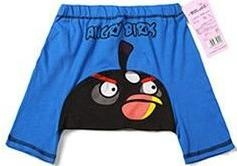

In [6]:
image_path = test_data_path.iloc[0]['image']
from IPython.display import Image, display
pil_img = Image(filename=image_path)
display(pil_img)

In [7]:
predictions = predictor.predict({'image': [image_path]})
print(predictions)

Predicting: |          | 0/? [00:00<?, ?it/s]

[0]


In [8]:
proba = predictor.predict_proba({'image': [image_path]})
print(proba)

Predicting: |          | 0/? [00:00<?, ?it/s]

[[0.3253113  0.31277245 0.18470179 0.17721449]]


In [9]:
image_byte = test_data_byte.iloc[0]['image']
predictions = predictor.predict({'image': [image_byte]})
print(predictions)

proba = predictor.predict_proba({'image': [image_byte]})
print(proba)

Predicting: |          | 0/? [00:00<?, ?it/s]

[0]


Predicting: |          | 0/? [00:00<?, ?it/s]

[[0.3253288  0.3127129  0.18473427 0.17722401]]


In [10]:
feature = predictor.extract_embedding({'image': [image_path]})
print(feature[0].shape)

Predicting: |          | 0/? [00:00<?, ?it/s]

(768,)


In [11]:
feature = predictor.extract_embedding({'image': [image_byte]})
print(feature[0].shape)

Predicting: |          | 0/? [00:00<?, ?it/s]

(768,)


In [12]:
loaded_predictor = MultiModalPredictor.load(model_path)
load_proba = loaded_predictor.predict_proba({'image': [image_path]})
print(load_proba)

Load pretrained checkpoint: /content/tmp/044dc0841be74004a3c7c3f20c4f11ab-automm_shopee/model.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

[[0.3251213  0.31266612 0.18484195 0.17737061]]
